In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 315
Open profit: -22.866999999999997
Close profit: -23.37
Open ROI: -0.07259365079365078
Close ROI: -0.0741904761904762
UDI: 0.004364418222923343
AxesSubplot(0.125,0.125;0.775x0.755)


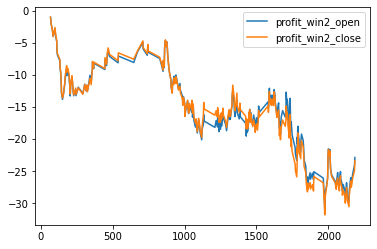

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_goal_03_A_loc,-0.166891
paper_03_H_plus_03_A_loc,-0.152656
expected_total_loc,-0.136962
sum_ufr_03_loc,-0.136682
paper_03_H_plus_03_A,-0.123291
simple_expected_total_value_loc,-0.108058
paper_H_plus_A_loc,-0.104584
paper_03_A,-0.103157
paper_03_A_loc,-0.102142
paper_03_H_loc,-0.098265


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_H_A_loc,-0.326744,-0.590857,0.264112
expected_difference_A_H_loc,0.326744,0.590857,0.264112
expected_difference_H_A,-0.282402,-0.545658,0.263256
expected_difference_A_H,0.282402,0.545658,0.263256
paper_diff_A_H,0.796019,1.008896,0.212877
paper_diff_H_A,-0.796019,-1.008896,0.212877
expected_difference_03_A_H_loc,0.208163,0.415388,0.207225
expected_difference_03_H_A_loc,-0.208163,-0.415388,0.207225
sum_ufr_classic_loc,5.404305,5.601375,0.197070
expected_difference_03_A_H,0.179727,0.375784,0.196056


In [10]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_03_A_H_loc'] >= 0.41) & (segmented_df['expected_difference_03_A_H'] >= 0.37)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_03_A_H_loc',
    'expected_difference_03_A_H',
], 'udi_win2')

,low,high,diff
expected_difference_03_A_H_loc,0.719965,0.820537,0.100573
expected_difference_03_A_H,0.584961,0.645067,0.060105


Count: 19
Open profit: 1.0900000000000003
Close profit: -0.9000000000000001
Open ROI: 0.057368421052631596
Close ROI: -0.04736842105263159
UDI: 0.08603491199162022
AxesSubplot(0.125,0.125;0.775x0.755)


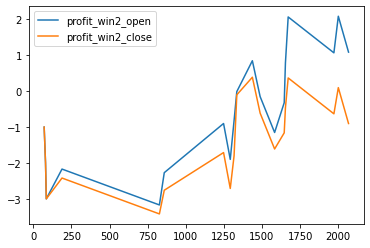

In [11]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference_03_A_H_loc'] >= 0.82) & (segmented_df['expected_difference_A_H'] >= 0.645)
]
utils.print_away_win_result(filtered_result_df)